# 안녕하세요^^ 
## AIVLE '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# 데이터 분석부터 먼저 시작해보겠습니다.
## "구 별 유동인구 데이터" 를 확인해 보도록 하겠습니다

In [1]:
# 필요 라이브러리부터 설치합니다.
# %pip install pandas seaborn

## 기본전제
* 처음에 제공되는 기본/추가 데이터는 '에이블러용' 폴더에 있습니다.

[기본 데이터]
* seoul_moving_month_202401.csv

[데이터 소개]
* 서울 시 구별 이동 2024년 1월 데이터
* https://data.seoul.go.kr/dataVisual/seoul/seoulLivingMigration.do

[변수 소개]
* 도착시간 : 0 -> "0:00~0:59"를 의미 
* 출발 자치구 : 자치구 코드
* 성별 : F(여성), M(남성)
* 나이 : 10 ~ 79세 (5세 단위), 0 ~ 10세, 80세 이상으로 구분
* 유형 : H(야간상주지), W(주간상주지)==>work, E(기타)
* 평균 이동 시간 : 동일 열 내 이동인구의 월 단위 평균 이동 시간 (10분단위)
* 이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리

---

# 1.데이터 불러오기
## 모든 미니 프로젝트의 시작은 '데이터 불러오기' 부터라고 할 수 있습니다.
+ KeyPoint : 불러오고자 하는 데이터에 따라 자유롭게 변수로 지정할 수 있다.

###  데이터 프레임을 불러오고 변수로 저장(여기서는 CSV 기준으로 진행)
* csv : pd.read_csv("파일이름. csv")
* txt : pd.read_csv("파일이름. csv", sep="구분자")
* xlsx : pd.read_excel('파일이름.xlsx')
* pickle : pd.read_pickle("파일이름.pkl") <br>
 [참고] pickle은 파이썬의 모든 객체를 파일로 저장할 수 있는 방법으로 DataFrame,List,Dict 등 모든 객체 저장 가능(특히 sklearn라이브러리를 통해 모델을 학습시키고, 저장할 때 많이 사용)

#### [실습문제1] 데이터 로딩
* Pandas 라이브러리를 활용해서 'seoul_moving_month_202401.csv' 데이터를 확인하세요.
    * 아래에 'Pandas'를 Import하고 'seoul_moving_month_202401.csv'파일을 'seoul_moving'에 불러오고,  Shape을 확인하는 소스코드를 작성하고 실행해보세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * UTF-8 인코더를 사용해 주세요

In [2]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.

import pandas as pd
seoul_moving = pd.read_csv('1.2 seoul_moving_month_202401.csv',sep=",", encoding = 'UTF-8')

In [3]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 데이터 프레임의 Shape을 확인합니다.
seoul_moving.shape

(29361031, 10)

---

# 2.기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [실습문제2] 기본 정보 확인하기
* 'seoul_moving' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head' 등 전부 활용해 보겠습니다.

In [4]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# describe()
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90


- 한건 한건이 이동한 기록

In [5]:
seoul_moving.describe()

,대상연월,도착시간,출발 시군구 코드,도착 시군구 코드,나이,평균 이동 시간(분)
count,29361031.0,2.936103e+07,2.936103e+07,2.936103e+07,2.936103e+07,2.936103e+07
mean,202401.0,1.362194e+01,1.710538e+04,1.718123e+04,4.285979e+01,9.366626e+01
std,0.0,5.835017e+00,9.024981e+03,9.037102e+03,1.799456e+01,7.803316e+01
min,202401.0,0.000000e+00,1.101000e+04,1.101000e+04,0.000000e+00,1.000000e+00
25%,202401.0,1.000000e+01,1.110000e+04,1.111000e+04,3.000000e+01,4.900000e+01
50%,202401.0,1.400000e+01,1.120000e+04,1.120000e+04,4.000000e+01,7.400000e+01
75%,202401.0,1.800000e+01,3.101400e+04,3.101400e+04,5.500000e+01,1.120000e+02
max,202401.0,2.300000e+01,3.900000e+04,3.900000e+04,8.000000e+01,4.462000e+03


In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# info()
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   대상연월         int64 
 1   요일           object
 2   도착시간         int64 
 3   출발 시군구 코드    int64 
 4   도착 시군구 코드    int64 
 5   성별           object
 6   나이           int64 
 7   이동유형         object
 8   평균 이동 시간(분)  int64 
 9   이동인구(합)      object
dtypes: int64(6), object(4)
memory usage: 2.2+ GB


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# head()
seoul_moving.head()

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90


* 1번 열의 의미
    * " 2024년 1월 일요일에 11010(종로구)에서 11010(종로구)으로 이동하여 0시 ~ 0시 59분 사이에 도착했고, E(기타)에서 E(기타)로 이동한 10 ~ 15세 여성은 총 11.96명이며 이들의 평균 이동시간은 167분이다


#### [실습문제3] 결측치 처리 ( NaN이 아닌 결측치를 처리 해봅시다)

* '이동인구(합)' column은 이동 인구의 합산인데 object 타입입니다. 

    - 왜 일까요? ==> '*'이 들어가 있어서 범주형으로 처리한듯

    - Tip! (이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경우 * 처리)
    - 3명 미만의 이동인구는 * 처리 되어 있어서 해당 값을 나름의 기준으로 변경하세요.(중위값)
    - '이동인구(합)' 컬럼의 데이터 타입을 수치형으로 변경하세요 

In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# value_counts()
seoul_moving['이동인구(합)'].value_counts()

이동인구(합)
*          3870174
6.05        420734
3.30        397265
3.29        286071
3.31        234821
            ...   
1617.95          1
2414.11          1
1499.98          1
1478.45          1
689.93           1
Name: count, Length: 140404, dtype: int64

In [9]:
# '*' 값의 최빈값과 평균값을 알 수 없는 상황이라 중위값으로 대체 (1.5명)
seoul_moving.loc[seoul_moving['이동인구(합)']=='*', '이동인구(합)'] = '1.5'

In [10]:
# 이동인구(합) column의 데이터 타입을 바꿔주세요
# astype()
seoul_moving['이동인구(합)'] = seoul_moving['이동인구(합)'].astype(float)
seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29361031 entries, 0 to 29361030
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   대상연월         int64  
 1   요일           object 
 2   도착시간         int64  
 3   출발 시군구 코드    int64  
 4   도착 시군구 코드    int64  
 5   성별           object 
 6   나이           int64  
 7   이동유형         object 
 8   평균 이동 시간(분)  int64  
 9   이동인구(합)      float64
dtypes: float64(1), int64(6), object(3)
memory usage: 2.2+ GB


#### [실습문제4] 이동유형, 요일, 성별 변수의 value수를 파악

* 역시나 value_counts()를 활용해 봅시다.

In [11]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 이동유형, value_counts()

seoul_moving['이동유형'].value_counts()

이동유형
EH    5947038
HE    5585412
EE    5224553
WH    3078348
WE    2759477
HW    2700535
EW    2330931
WW    1082641
HH     652096
Name: count, dtype: int64

In [12]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 요일, value_counts()
seoul_moving['요일'].value_counts()

요일
월    4448237
수    4341429
화    4300070
토    4254525
금    4251430
목    4005959
일    3759381
Name: count, dtype: int64

- 아무래도 월요일이 일주일의 첫 시작이라...? 

* 24년 1월의 요일 수를 알려드릴게요
    * 일 : 4, 월 : 5, 화 : 5, 수 : 5, 목 : 4, 금 : 4, 토 : 4

In [13]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 성별, value_counts()
seoul_moving['성별'].value_counts()

성별
M    16433525
F    12927506
Name: count, dtype: int64

- 남성의 유동인구수가 더 많은 것을 알 수 있다. ==> 근데 이거는 표본을 그렇게 집계한거라 아직은 모름

#### [실습문제5] 어느 요일의 심야 이동이 가장 많을까요?

In [14]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 새벽 5시까지 도착하는 이동 사례, seoul_moving_night 변수 저장
seoul_moving_night = seoul_moving.loc[seoul_moving['도착시간']<=5]
seoul_moving_night.groupby(by='요일', as_index=False)[['도착시간']].count()

,요일,도착시간
0,금,397406
1,목,379779
2,수,414321
3,월,439563
4,일,387318
5,토,447240
6,화,403295


- 수요일에서 심야이동이 가장 많은 것을 파악할 수 있다.

#### [실습문제6] 서울 지역의 데이터만 골라 보도록 하겠습니다.

* 우리는 서울시의 데이터만 필요합니다.
* 시군구 코드:광역시도(2자리)+시군구(3자리) / 서울:11, 부산:26, 대구:27, 인천:28, 광주:29, 대전:30, 울산:31)

* 출발과 도착이 모두 서울인 데이터만 추출해 주세요.

In [15]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 출발 시군구 코드, 도착 시군구 코드 <20000

In [16]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
seoul_moving = seoul_moving.loc[(seoul_moving['출발 시군구 코드'] < 20000) & (seoul_moving['도착 시군구 코드'] < 20000)]   # 출발과 도착이 모두 서울 이내 데이터이어야함

#### [실습문제7] 서울지역의 구 별로 groupby하여 데이터를 확인하겠습니다 (유동인구 기준)

* 유출이 제일 많은 구는?

* 유입이 제일 많은 구는?

* 유출이 제일 적은 구는?

* 유입이 제일 적은 구는?

* 참고자료 서울 구별 코드
    * 11010	종로구
    * 11020	중구
    * 11030	용산구
    * 11040	성동구
    * 11050	광진구
    * 11060	동대문구
    * 11070	중랑구
    * 11080	성북구
    * 11090	강북구
    * 11100	도봉구
    * 11110	노원구
    * 11120	은평구
    * 11130	서대문구
    * 11140	마포구
    * 11150	양천구
    * 11160	강서구
    * 11170	구로구
    * 11180	금천구
    * 11190	영등포구
    * 11200	동작구
    * 11210	관악구
    * 11220	서초구
    * 11230	강남구
    * 11240	송파구
    * 11250	강동구

In [17]:
seoul_moving

,대상연월,요일,도착시간,출발 시군구 코드,도착 시군구 코드,성별,나이,이동유형,평균 이동 시간(분),이동인구(합)
0,202401,일,0,11010,11010,F,0,EE,20,28.06
1,202401,일,0,11010,11010,F,10,EE,167,11.96
2,202401,일,0,11010,11010,F,10,EH,203,17.63
3,202401,일,0,11010,11010,F,10,HE,23,5.96
4,202401,일,0,11010,11010,F,10,WH,27,5.90
...,...,...,...,...,...,...,...,...,...,...
29320192,202401,토,23,11250,11250,M,80,EH,18,28.41
29320193,202401,토,23,11250,11250,M,80,HE,78,9.46
29320194,202401,토,23,11250,11250,M,80,HW,168,9.48
29320195,202401,토,23,11250,11250,M,80,WH,16,47.27


In [18]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유출이 제일 많은 구와 적은 구는?
seoul_moving.groupby(by='출발 시군구 코드', as_index=False)[['성별']].count().sort_values(by='성별', ascending=False)

,출발 시군구 코드,성별
22,11230,586427
21,11220,518286
1,11020,515531
18,11190,508445
0,11010,507747
13,11140,498059
23,11240,474428
3,11040,466867
5,11060,462831
2,11030,461328


- 강남구가 유출이 제일 많고, 금천구가 유출이 가장 적다

In [19]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 유입이 제일 많은 구와 적은 구는?

seoul_moving.groupby(by='도착 시군구 코드', as_index=False)[['성별']].count().sort_values(by='성별', ascending=False)

,도착 시군구 코드,성별
22,11230,564757
21,11220,506191
18,11190,501537
1,11020,491583
13,11140,488068
0,11010,483374
23,11240,471925
5,11060,465506
3,11040,463307
7,11080,458452


- 마찬가지로 강남구가 유입이 가장 많았고, 금천구가 유입이 가장 적었다

#### [실습문제8] 낮시간만 볼게요 심야버스 제외하겠습니다

* 도착시간 0부터 4까지(0:00 ~ 4:59) 제거

In [20]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# '도착시간' >=5
seoul_afternoon = seoul_moving.loc[seoul_moving['도착시간'] >= 5]

[실습문제9] '도착 시군구 코드' 를 기준으로 각 구별로 '평균 이동 시간(분)' , '이동인구(합)' 의 평균 과 합을 구해보겠습니다

* groupby 사용, as_index=False로 설정해주세요

In [42]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 평균을 구해서 df_mean 변수로 저장
df_mean = seoul_moving.groupby(by = '도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].mean()
df_mean

,도착 시군구 코드,평균 이동 시간(분),이동인구(합)
0,11010,60.151307,41.911289
1,11020,58.450528,44.128266
2,11030,58.494740,34.245515
3,11040,58.879851,39.001257
4,11050,61.807174,42.697635
5,11060,60.745357,37.893985
6,11070,65.215023,38.634336
7,11080,60.975391,41.781254
8,11090,66.486808,36.267589
9,11100,68.365541,35.406292


In [43]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
# 합을 구해서 df_sum 변수로 저장
# 평균이동시간(분) -> 총 이동 시간, 이동인구(합) -> 총 이동인구로 이름 대체
df_sum = seoul_moving.groupby(by = '도착 시군구 코드', as_index=False)[['평균 이동 시간(분)', '이동인구(합)']].sum()
df_sum.columns = ['도착 시군구 코드', '총 이동 시간', '총 이동인구']
df_sum

,도착 시군구 코드,총 이동 시간,총 이동인구
0,11010,29075578,20258827.46
1,11020,28733286,21692705.49
2,11030,26487237,15506848.68
3,11040,27279447,18069555.27
4,11050,26804906,18517366.67
5,11060,28277328,17639877.61
6,11070,25059916,14845861.77
7,11080,27954290,19154699.51
8,11090,23924081,13050239.21
9,11100,22060398,11425008.61


In [44]:
# 파일을 합쳐볼까요
# pd.merge()
total2 = pd.merge(df_mean, df_sum, on='도착 시군구 코드', how='outer')
# df_mean
# df_sum
total2


,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,60.151307,41.911289,29075578,20258827.46
1,11020,58.450528,44.128266,28733286,21692705.49
2,11030,58.494740,34.245515,26487237,15506848.68
3,11040,58.879851,39.001257,27279447,18069555.27
4,11050,61.807174,42.697635,26804906,18517366.67
5,11060,60.745357,37.893985,28277328,17639877.61
6,11070,65.215023,38.634336,25059916,14845861.77
7,11080,60.975391,41.781254,27954290,19154699.51
8,11090,66.486808,36.267589,23924081,13050239.21
9,11100,68.365541,35.406292,22060398,11425008.61


In [24]:
# 해당 데이터프레임을 csv 파일로 저장하세요
# to_csv()
total2.to_csv('total2.csv', index=False)

---

# 3.데이터 분석하기
+ KeyPoint : 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별할 수 있다.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [25]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

#### [실습문제10] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [26]:
total2 = pd.read_csv('total2.csv')

In [27]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
total2.head()

,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,59.819645,44.694476,26504649,19803049.50
1,11020,58.197800,47.183639,26065980,21132891.17
2,11030,57.995736,36.418986,23776976,14930983.13
3,11040,58.184820,41.879404,24144722,17378528.65
4,11050,60.890991,45.669953,23556776,17668243.56


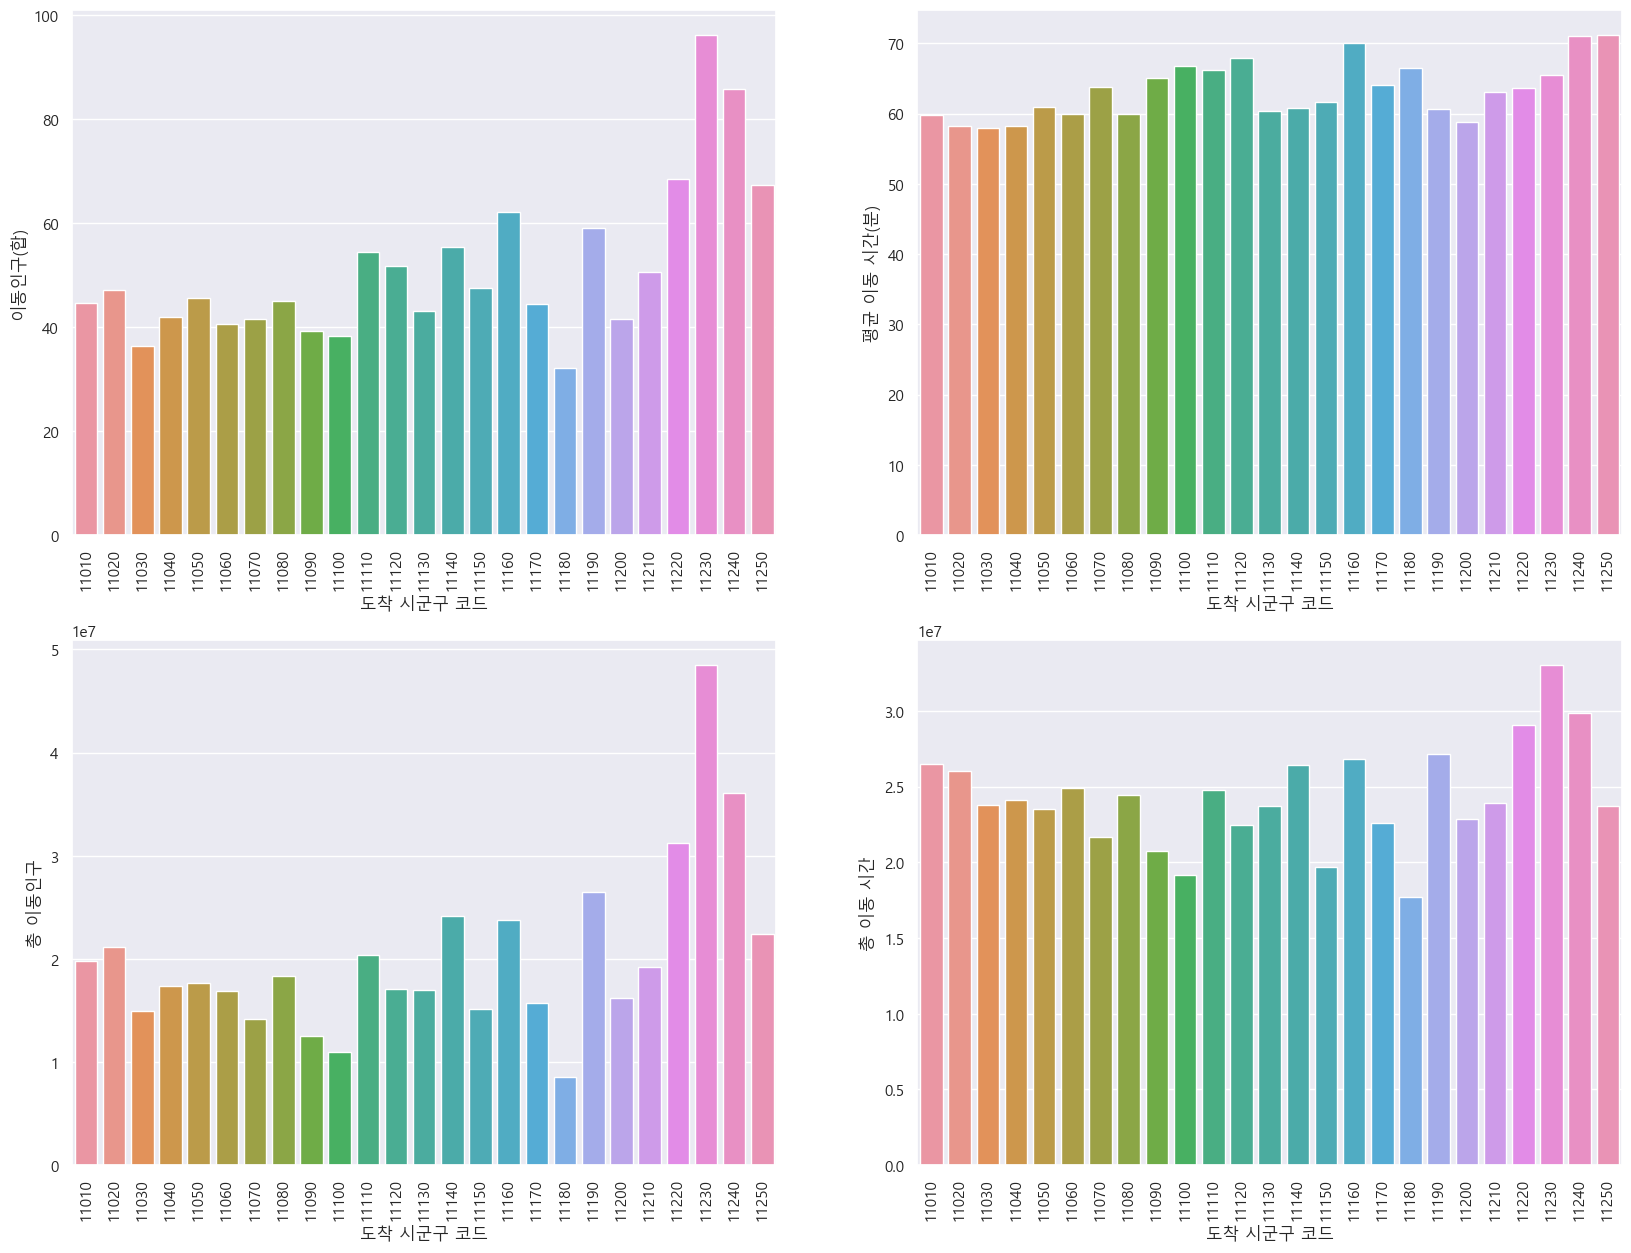

In [28]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.barplot(x='도착 시군구 코드', y='이동인구(합)', data=total2)
plt.xticks(rotation=90)
plt.subplot(2,2,3)
sns.barplot(x='도착 시군구 코드', y='총 이동인구', data=total2)
plt.xticks(rotation=90)
plt.subplot(2,2,2)
sns.barplot(x='도착 시군구 코드', y='평균 이동 시간(분)', data=total2)
plt.xticks(rotation=90)
plt.subplot(2,2,4)
sns.barplot(x='도착 시군구 코드', y='총 이동 시간', data=total2)
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='평균 이동 시간(분)', ylabel='총 이동 시간'>

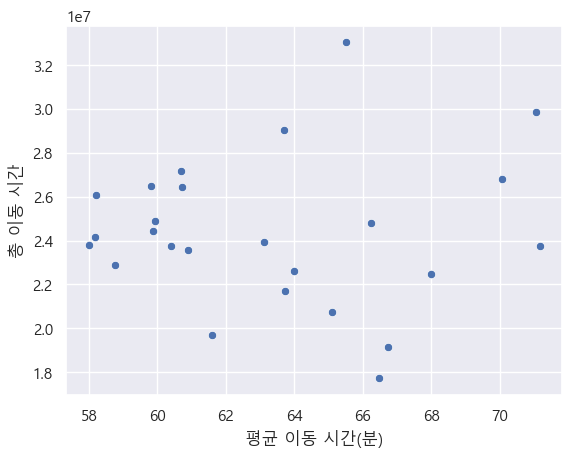

In [29]:
sns.scatterplot(x='평균 이동 시간(분)', y = '총 이동 시간', data=total2)

- 평균 이동시간과 평균 이동수를 보자 ==> 총인구수/총이동시간 - 평균이동시간 아무래도 총 인구수는 파악하기 힘들지 않을까????

In [30]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 지역구별 총 유동인구수와 평균 유동인구수의 분포가 비슷하다.
# 2. 강남구의 유동인구가 많은 것을 알 수 있다. 동작구(11200), 관악구(11210), 강북구(11090), 도봉구(11100)는 대체적으로 평균이동인구수가 적다.
# 3. 강서구, 송파구, 강동구는 평균 이동시간이 1시간이 넘어간다... ==> 아무래도 서울의 양쪽끝을??? 담당..?
# 4. 그리고 의외로 한시간 가까이 나온게 은평구(도로 면적 합이 제일 넓었던 곳), 도봉구도 1시간 가까이 나옴 서울의 맨 위??
# 근데 추가적으로 그 자치구별 면적이랑 거주인구수도 고려를 해야하지 않을까..?


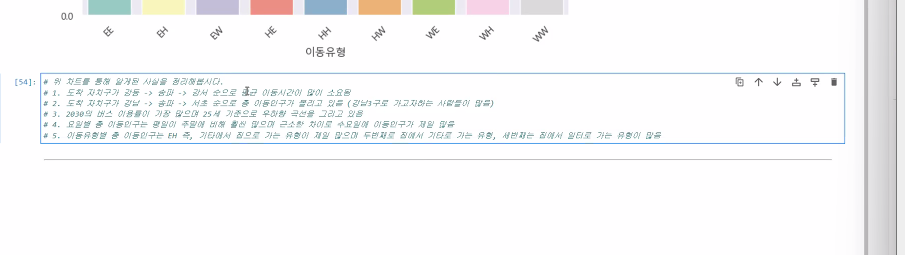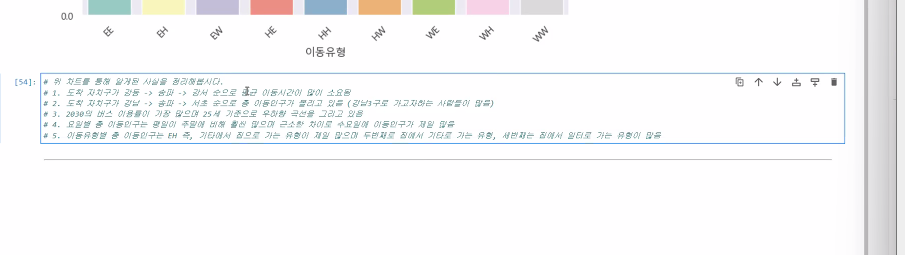

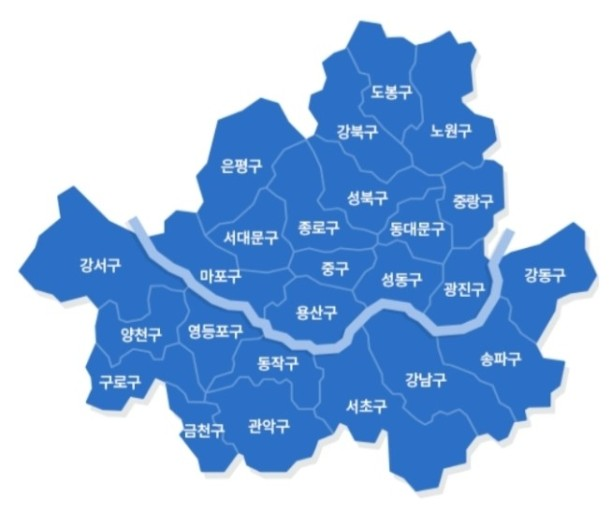

1. 서울은 몇개의 구로 이루어져있을까요?: 25개
2. 인구가가장많은구는? 가장적은구는?: 송파구, 중구
3. 면적이가장큰구는? 면적이가장작은구는? : 서초구, 중구
4. 도로길이합이제일긴구는? (고속도로제외) : 성북구
5. 도로면적합이제일큰구는? : 은평구


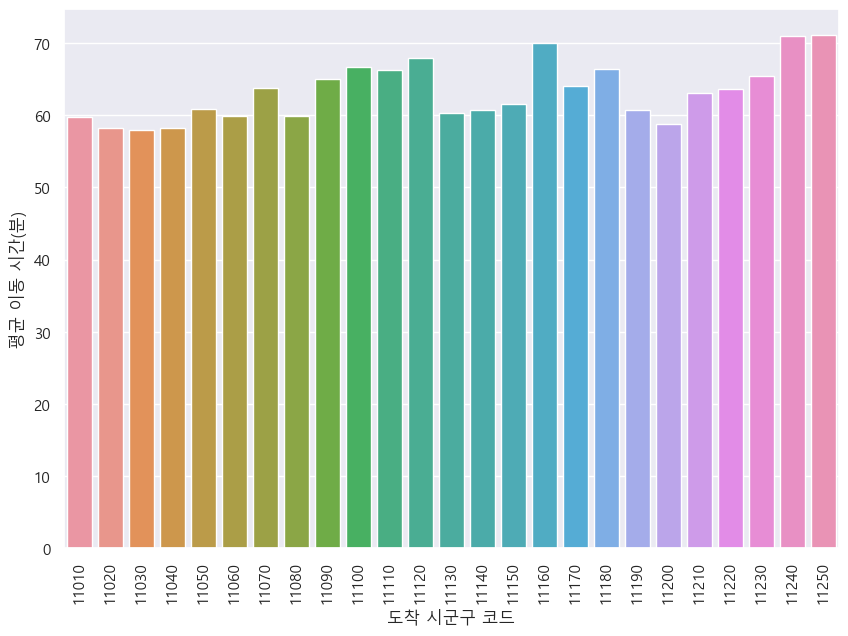

In [31]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
plt.figure(figsize=(10,7))
sns.barplot(x='도착 시군구 코드', y='평균 이동 시간(분)', data=total2)
plt.xticks(rotation=90)
plt.show()

# 1.1에서 구한 total 파일이랑 연결해서 추가 학습

In [32]:
total = pd.read_csv('total.csv')
total2 = pd.read_csv('total2.csv')

In [33]:
display(total.head())
display(total2.head())

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,6960336.0,6597087.0,123.257234,116.824633
1,강동구,367,22,2515582.0,2460905.0,91.578944,89.588445
2,강북구,410,71,3998077.0,3858057.0,126.465395,122.036345
3,강서구,567,51,3981173.0,3963283.0,86.932767,86.542122
4,관악구,466,81,5862490.0,5996915.0,134.946712,138.040996


,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,11010,59.819645,44.694476,26504649,19803049.50
1,11020,58.197800,47.183639,26065980,21132891.17
2,11030,57.995736,36.418986,23776976,14930983.13
3,11040,58.184820,41.879404,24144722,17378528.65
4,11050,60.890991,45.669953,23556776,17668243.56


In [34]:
total2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   도착 시군구 코드    25 non-null     int64  
 1   평균 이동 시간(분)  25 non-null     float64
 2   이동인구(합)      25 non-null     float64
 3   총 이동 시간      25 non-null     int64  
 4   총 이동인구       25 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 1.1 KB


In [35]:
total2['자치구'] = total2['도착 시군구 코드'].map({
    11010: '종로구',
    11020: '중구',
    11030: '용산구',
    11040: '성동구',
    11050: '광진구',
    11060: '동대문구',
    11070: '중랑구',
    11080: '성북구',
    11090: '강북구',
    11100: '도봉구',
    11110: '노원구',
    11120: '은평구',
    11130: '서대문구',
    11140: '마포구',
    11150: '양천구',
    11160: '강서구',
    11170: '구로구',
    11180: '금천구',
    11190: '영등포구',
    11200: '동작구',
    11210: '관악구',
    11220: '서초구',
    11230: '강남구',
    11240: '송파구',
    11250: '강동구'})

In [36]:
df = pd.merge(total, total2, on='자치구', how='inner')
df

,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,도착 시군구 코드,평균 이동 시간(분),이동인구(합),총 이동 시간,총 이동인구
0,강남구,501,98,6960336.0,6597087.0,123.257234,116.824633,11230,65.514763,96.164419,33027630,48478887.79
1,강동구,367,22,2515582.0,2460905.0,91.578944,89.588445,11250,71.164350,67.258181,23738648,22435647.77
2,강북구,410,71,3998077.0,3858057.0,126.465395,122.036345,11090,65.100321,39.190099,20733085,12481223.62
3,강서구,567,51,3981173.0,3963283.0,86.932767,86.542122,11160,70.061809,62.125087,26804527,23768064.39
4,관악구,466,81,5862490.0,5996915.0,134.946712,138.040996,11210,63.117149,50.625584,23922851,19188260.69
5,광진구,274,43,2365355.0,2382437.0,107.491706,108.267985,11050,60.890991,45.669953,23556776,17668243.56
6,구로구,486,80,4204229.0,4023135.0,114.700415,109.759781,11170,64.003441,44.465770,22617472,15713269.19
7,금천구,346,56,3133461.0,3014364.0,123.088384,118.410025,11180,66.485466,32.100454,17718709,8554931.56
8,노원구,495,58,3553485.0,3497450.0,83.356439,82.041989,11110,66.251638,54.399453,24780365,20347245.15
9,도봉구,366,54,2771076.0,2695540.0,101.649829,98.878985,11100,66.744401,38.268616,19132149,10969622.19


In [37]:
# sns.pairplot(df, kind='reg')
# plt.show()

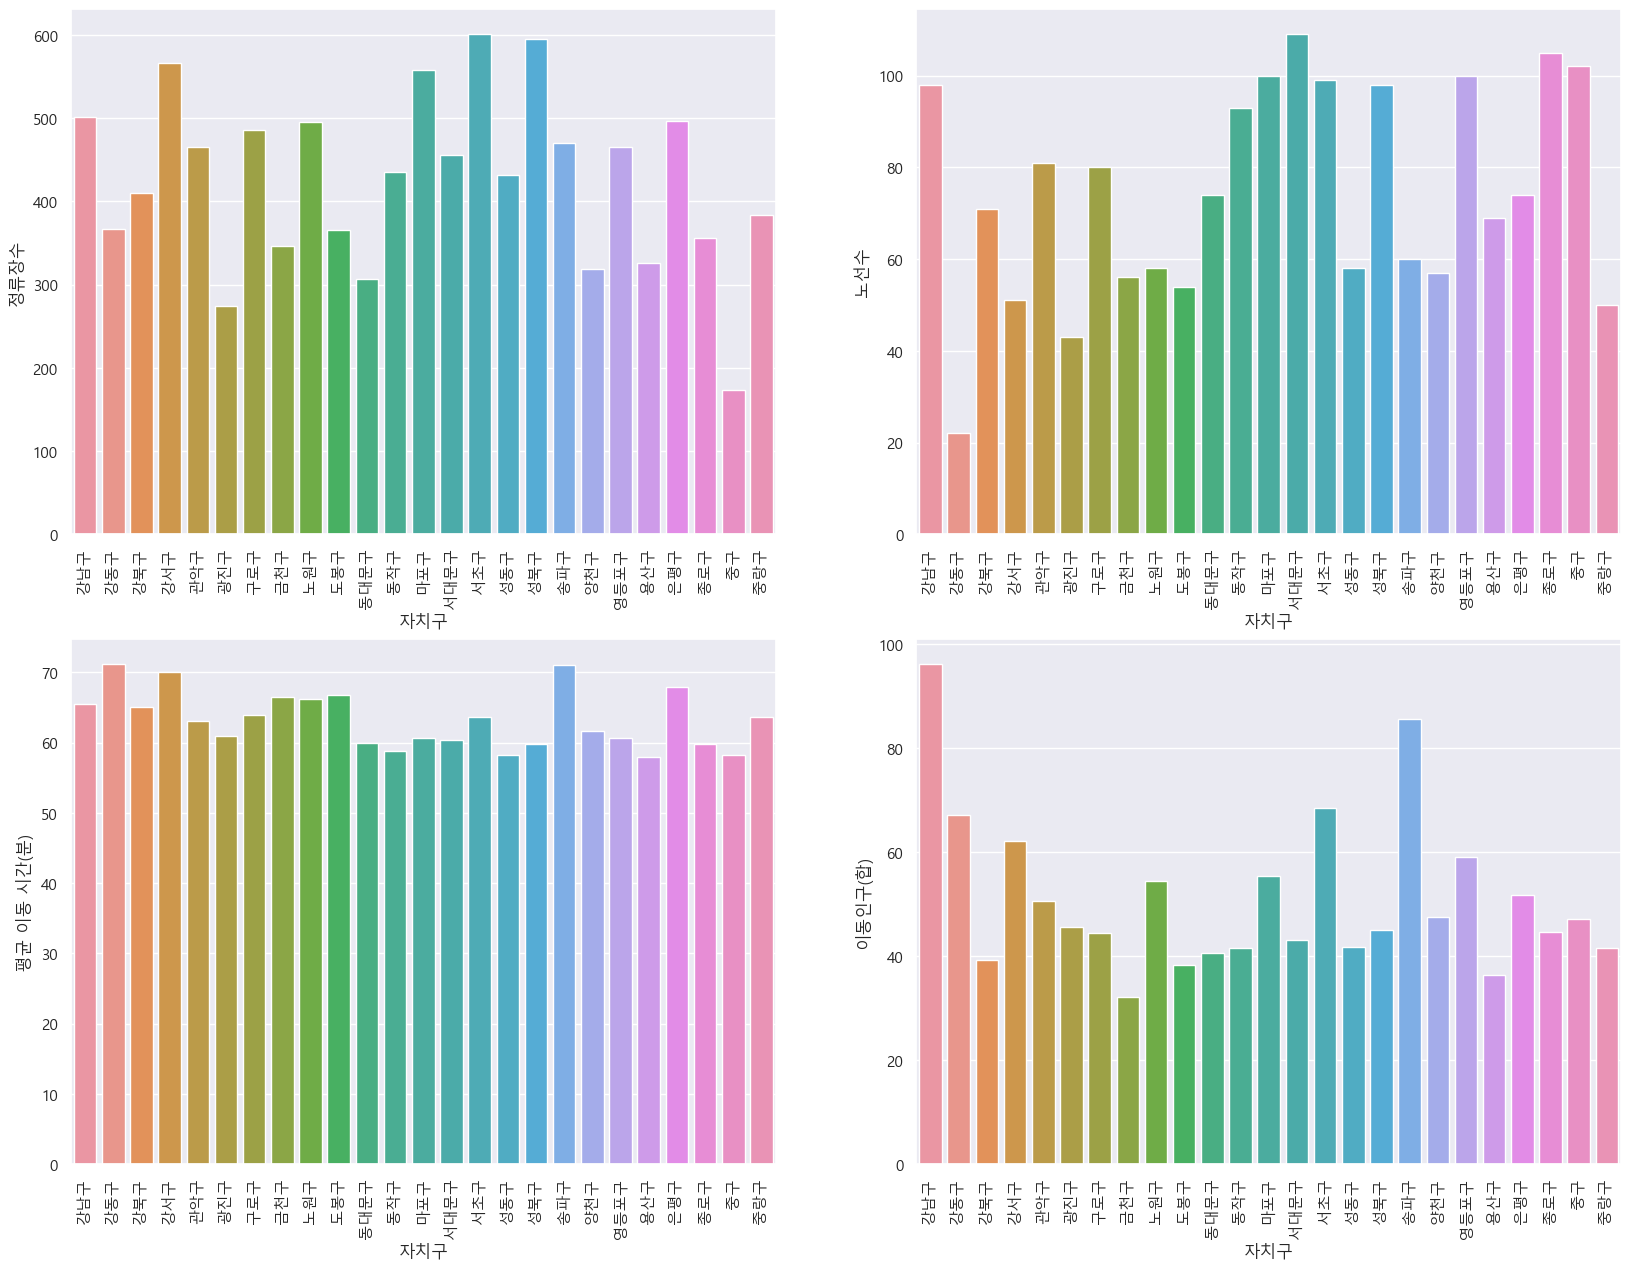

In [38]:
# 자치구별 정류장 수를 볼 수 있는 그래프를 출력해주세요.

plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sns.barplot(x='자치구', y='정류장수', data=df)
plt.xticks(rotation=90)
plt.subplot(2, 2, 2)
sns.barplot(x='자치구', y='노선수', data=df)
plt.xticks(rotation=90)
plt.subplot(2, 2, 4)
sns.barplot(x='자치구', y='이동인구(합)', data=df)
plt.xticks(rotation=90)
plt.subplot(2, 2, 3)
sns.barplot(x='자치구', y='평균 이동 시간(분)', data=df)
plt.xticks(rotation=90)

plt.show()

In [39]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

---